# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

Obserable Trends:
* As expected the tempature is distinguishably warmer near the equator; however, there's also significant warm tempature's around to 60 degrees lat. line, which could be due to the eath's tilt and time of year.

* There wasn't much of a relationship between latitude and humidity or cloudiness and wind speed. 

* Wind speed seems to increase slightly as we move away from the equator, which could be a causal affect by the jet stream.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=georgetown
Processing Record 2 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=bubaque
Processing Record 3 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=bredasdorp
City not found. Skipping...
Processing Record 4 | Blagoyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=blagoyevo
Processing Record 5 | Zarautz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=zarautz
Processing Record 6 | Montepuez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=montepuez
Processing Record 7 | New Norfolk
http://api.open

Processing Record 57 | Springbok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=springbok
Processing Record 58 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=chokurdakh
Processing Record 59 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=los llanos de aridane
Processing Record 60 | Kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=kapit
City not found. Skipping...
Processing Record 61 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=guerrero negro
Processing Record 62 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=narsaq
Processing Record 63 | Jamestown
http://api.openweathermap.org/data/2.5/we

Processing Record 112 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=ponta do sol
Processing Record 113 | Ushibuka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=ushibuka
Processing Record 114 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=clyde river
Processing Record 115 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=norman wells
Processing Record 116 | Mattru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=mattru
Processing Record 117 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=port elizabeth
Processing Record 118 | Praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a

Processing Record 167 | Sawakin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=sawakin
Processing Record 168 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=souillac
Processing Record 169 | Gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=gorontalo
Processing Record 170 | Danville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=danville
Processing Record 171 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=sitka
Processing Record 172 | Itaituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=itaituba
Processing Record 173 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=an

City not found. Skipping...
Processing Record 223 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=sao filipe
Processing Record 224 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=bambous virieux
Processing Record 225 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=saint-pierre
Processing Record 226 | Maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=maceio
Processing Record 227 | Uyuni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=uyuni
Processing Record 228 | Kihei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=kihei
Processing Record 229 | Shitkino
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 278 | Chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=chumikan
Processing Record 279 | Effium
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=effium
Processing Record 280 | Quang Ngai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=quang ngai
City not found. Skipping...
Processing Record 281 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=riyadh
Processing Record 282 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=vestmannaeyjar
City not found. Skipping...
Processing Record 283 | Hoi An
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=hoi an
Processing Record 284 | Ankang
http://api.openweathermap.org/data/2.5/

Processing Record 333 | Truckee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=truckee
Processing Record 334 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=lompoc
Processing Record 335 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=pevek
City not found. Skipping...
City not found. Skipping...
Processing Record 336 | Rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=rongcheng
Processing Record 337 | Inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=inirida
Processing Record 338 | Yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=yarmouth
Processing Record 339 | Gorele
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 388 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=nouadhibou
Processing Record 389 | Tandil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=tandil
Processing Record 390 | Kitui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=kitui
Processing Record 391 | Moba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=moba
City not found. Skipping...
Processing Record 392 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=touros
Processing Record 393 | Itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=itoman
Processing Record 394 | Asgardstrand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d

Processing Record 444 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=eureka
Processing Record 445 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=tura
Processing Record 446 | North Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=north bend
Processing Record 447 | Kaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=kaka
Processing Record 448 | Belyy Yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=belyy yar
Processing Record 449 | Rincon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=rincon
Processing Record 450 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=mahebourg
C

Processing Record 500 | Parola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=parola
Processing Record 501 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=faya
Processing Record 502 | Palomares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=palomares
City not found. Skipping...
Processing Record 503 | San Felipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=san felipe
Processing Record 504 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=cayenne
Processing Record 505 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a4a6a4b8c1e5adfd9d148dc5d492fcf&q=prince rupert
Processing Record 506 | Yakeshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [5]:
# Save data frame to CSV
weather_data.to_csv("weather_data.csv")

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Georgetown,20,GY,1540677600,78,6.80,-58.16,82.40,9.17
1,Bubaque,0,GW,1540677600,88,11.28,-15.83,82.40,3.36
2,Bredasdorp,56,ZA,1540677600,88,-34.53,20.04,66.20,13.87
3,Blagoyevo,88,RU,1540681471,92,63.37,47.92,31.11,3.51
4,Zarautz,40,ES,1540679400,93,43.28,-2.17,44.60,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

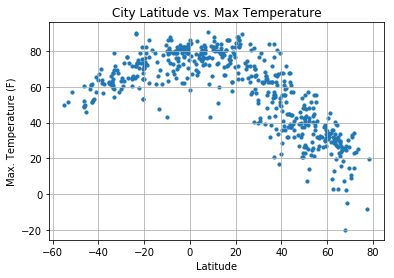

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

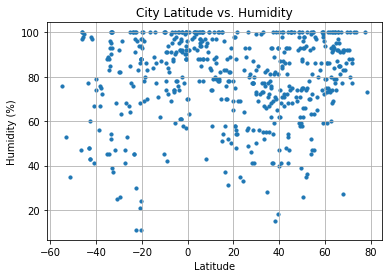

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

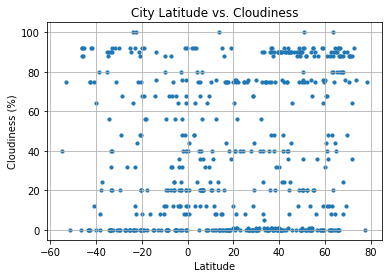

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

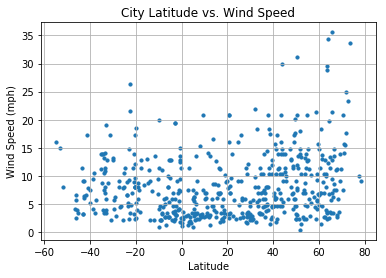

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()